In [10]:
import numpy as np

def load_file_data(file_path):
    X = []
    y = []
    text = np.loadtxt(file_path, skiprows=1)
    X.append(text[:, 1:])
    y.append(text[:, 0])
    return np.concatenate(X, axis=0), np.concatenate(y, axis=0)

file_path = '../gmm/GMM6.txt'
X, y = load_file_data(file_path)

## Original data visualization

(1000, 2) (1000,)


C:\Users\13476\AppData\Local\Temp\ipykernel_28388\1097369472.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  marker='o', s=5, cmap=plt.cm.get_cmap('Set1', n_classes))


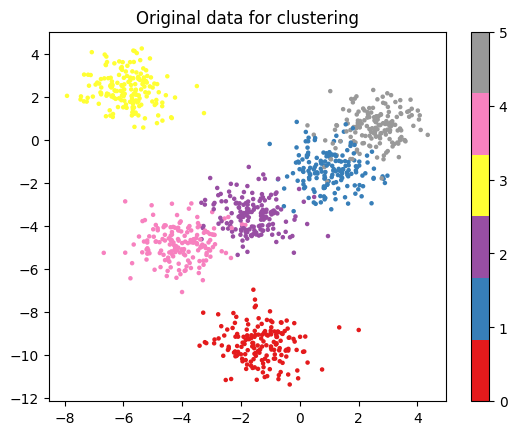

In [11]:
import matplotlib.pyplot as plt

print(X.shape, y.shape)
n_classes = int(np.max(np.unique(y))) + 1 # num of clusters or labels
plt.scatter(X[:, 0], X[:, 1], c=y, \
            marker='o', s=5, cmap=plt.cm.get_cmap('Set1', n_classes))
plt.colorbar()
plt.title('Original data for clustering')
plt.show()

## kMeans Clustering

In [ ]:
# k_means.py
import numpy as np

"""
包含 k 个随机质心的集合。随机质心在整个数据集的边界之内，可以通过找到数据集每一维的最小和最大值,
生成 0~1.0 之间的随机数并通过取值范围和最小值，以便确保随机点在数据的边界之内。
"""
def randCent(dataSet, k):
    n = dataSet.shape[1]         # 列的数量，即数据的特征个数
    centroids = np.zeros((k, n)) # 创建k个质心矩阵
    for j in range(n):           # 创建随机簇质心，并且在每一维的边界内
        minJ = np.min(dataSet[:, j])     # 最小值
        rangeJ = float(np.max(dataSet[:, j]) - minJ)    # 范围 = 最大值 - 最小值
        centroids[:, j] = minJ + rangeJ * np.random.rand(k)  
    return centroids

# display final results for clustering
def kMeans_display(centroids, clusters, wcss_history, K=6):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(wcss_history, '.--')
    ax[0].set_title('Final WCSS')

    ax[1].scatter(X[:, 0], X[:, 1], c=clusters[:, 0], \
                  marker='o', s=5, cmap=plt.cm.get_cmap('Set1', K))
    ax[1].scatter(centroids[:, 0], centroids[:, 1], c=np.arange(K), \
                  marker='x', s=200, linewidths=3, cmap=plt.cm.get_cmap('Set1', K))
    ax[1].set_title('Final Iteration')


C:\Users\13476\AppData\Local\Temp\ipykernel_15316\842328748.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  marker='o', s=5, cmap=plt.cm.get_cmap('Set1', K))
C:\Users\13476\AppData\Local\Temp\ipykernel_15316\842328748.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  marker='x', s=200, linewidths=3, cmap=plt.cm.get_cmap('tab10', K))


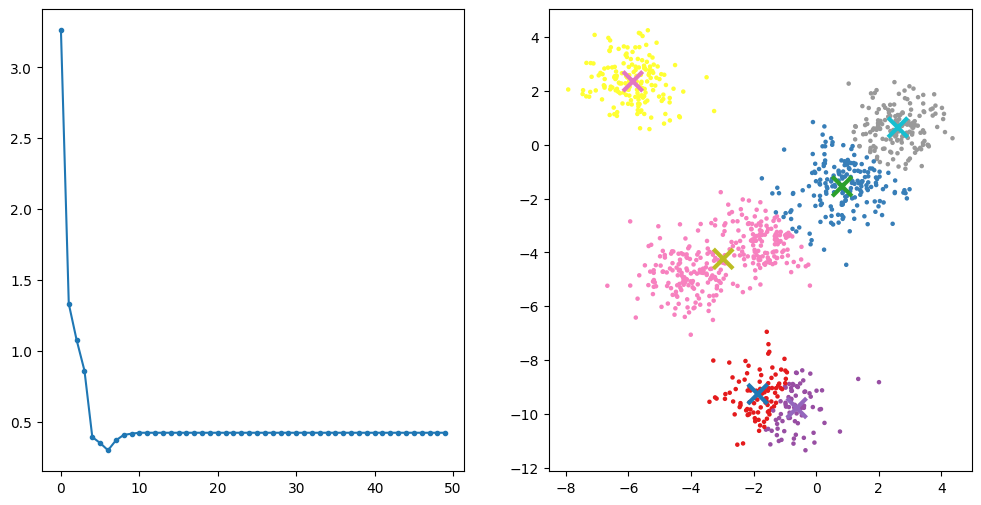

(6, 2) (1000, 2)
[[-1.86806185 -9.26505943]
 [ 0.82976492 -1.5477169 ]
 [-0.62132333 -9.78548695]
 [-5.85378895  2.35530855]
 [-2.96626581 -4.24113416]
 [ 2.60886397  0.64110024]]


In [11]:
def kMeans(X, K, max_iters=100, if_display=True):
    n_samples, n_features = X.shape
    clusters = np.zeros((n_samples, n_features))  # 保存每个数据点的簇分配结果和平方误差
    centroids = randCent(X, K)
    cluster_changed = True
    iter = 0
    wcss_history = []

    plt.ion()
    if if_display: # if display iteration procession
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    while cluster_changed and iter < max_iters:
        cluster_changed = False
        for i in range(n_samples):
            min_dist = np.inf
            min_index = -1
            for j in range(K):
                dist = np.sum((X[i] - centroids[j]) ** 2)
                if dist < min_dist:
                    min_dist = dist
                    min_index = j
                if clusters[i, 0] != min_index:
                    cluster_changed = True
            clusters[i, :] = min_index, min_dist
        
        wcss = np.sum(min_dist)
        wcss_history.append(wcss)
        # print(centroids)

        for cent in range(K): # Updata centroids
            Inclusters = X[np.nonzero(clusters[:, 0] == cent)[0]]
            centroids[cent, :] = np.mean(Inclusters, axis=0)   
        iter += 1
        
        if if_display: # if display iteration procession          
            ax[0].cla()
            ax[0].plot(wcss_history, '.-')
            ax[0].set_title(f'WCSS: {wcss:.4f}')

            ax[1].cla()
            ax[1].scatter(X[:, 0], X[:, 1], c=clusters[:, 0], \
                        marker='o', s=5, cmap=plt.cm.get_cmap('Set1', K))
            ax[1].scatter(centroids[:, 0], centroids[:, 1], c=np.arange(K), \
                        marker='x', s=200, linewidths=3, cmap=plt.cm.get_cmap('Set1', K))
            ax[1].set_title(f'Iteration {iter}')

            plt.pause(0.2)  # 暂停一段时间以便动态显示
    
    kMeans_display(centroids, clusters, wcss_history, K=K)
    plt.ioff()
    plt.show()
    
    return centroids, clusters, wcss_history

centroids, clusters, _ = kMeans(X, K=6, max_iters=50, if_display=False)
print(centroids.shape, clusters.shape)
print(centroids)


## GMM Clustering


the converged log-likelihood: -4.024873047481583, iternations: 3


C:\Users\13476\AppData\Local\Temp\ipykernel_28388\748314637.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  s=5, cmap=plt.cm.get_cmap('Set1', K))


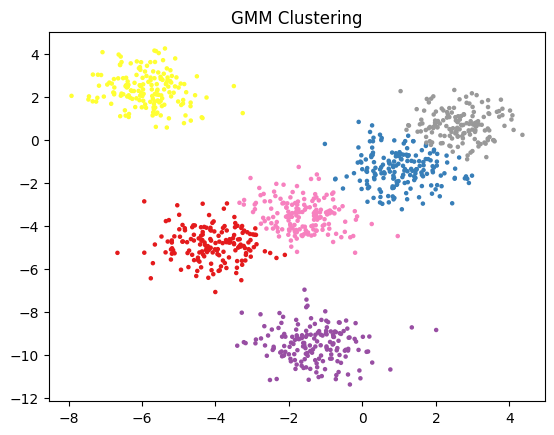

In [12]:
from sklearn.mixture import GaussianMixture
K = n_classes
gmm = GaussianMixture(n_components=K, max_iter=50, random_state=0)
gmm.fit(X)

# Assign a label to each sample
labels = gmm.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, \
            s=5, cmap=plt.cm.get_cmap('Set1', K))
plt.title('GMM Clustering')

# print the converged log-likelihood value and  the number of iterations needed
print(f"the converged log-likelihood: {gmm.lower_bound_}, iternations: {gmm.n_iter_}")

In [16]:
from sklearn import metrics

# 计算 Rand 统计量
rand_score = metrics.adjusted_rand_score(y, labels)
# 计算 FM 指数
fowlkes_mallows_score = metrics.fowlkes_mallows_score(y, labels)
# 计算轮廓系数
silhouette_score = metrics.silhouette_score(X, labels)

print(f"Rand Score: {rand_score:.4f}, FM Score: {fowlkes_mallows_score:.4f}, Silhouette Score: {silhouette_score:.4f}")


Rand Score: 0.9091, FM Score: 0.9242, Silhouette Score: 0.5969


In [ ]:
from itertools import combinations
from collections import Counter

# 计算 Rand 统计量
def rand_index_score(true_labels, predicted_labels):
    tp_plus_fp = choose_n_2(Counter(predicted_labels))
    tp_plus_fn = choose_n_2(Counter(true_labels))
    a = sum(choose_n_2(Counter([x for x in combinations(clust, 2)])) for clust in predicted_labels)
    b = sum(choose_n_2(Counter([x for x in combinations(clust, 2)])) for clust in true_labels)
    return (a + b - 2 * tp_plus_fp) / (tp_plus_fn + tp_plus_fp)

def choose_n_2(counter):
    return sum(choose(n, 2) for n in counter.values())

def choose(n, k):
    return 0 if k > n else 1 if k == 1 else choose(n - 1, k) + choose(n - 1, k - 1)

# 计算 FM 指数
def fowlkes_mallows_score(true_labels, predicted_labels):
    tp = sum(choose_n_2(Counter(clust)) for clust in predicted_labels if len(clust) > 1)
    tp_plus_fp = choose_n_2(Counter(chain(*predicted_labels)))
    tp_plus_fn = choose_n_2(Counter(chain(*true_labels)))
    return tp / ((tp_plus_fp * tp_plus_fn) ** 0.5)

# 计算轮廓系数
def silhouette_score(X, labels):
    n = len(X)
    a = np.array([np.mean([np.linalg.norm(X[i] - X[j]) for j in range(n) \
                           if labels[j] == labels[i]]) for i in range(n)])
    b = np.array([min([np.mean([np.linalg.norm(X[i] - X[j]) for j in range(n) \
                                 if labels[j] != labels[i]]) for i in range(n) \ 
                                 if labels[j] != labels[i]]) for i in range(n)])
    return np.mean((b - a) / np.maximum(a, b))

